<a href="https://colab.research.google.com/github/crossorbit/hgmldl/blob/main/1%5BB%5D_scikit_image_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# scikit-image
scikit-image는 이미지처리에 특화된 Python 이미지 라이브러리이며 Numpy배열로 이미지 객체를 네이티브하게 다룹니다.

## 설치
---
pip 또는 Anaconda를 통해 설치를 진행합니다.

```python 
pip install scikit-image
```  
또는 
```python 
conda install -c conda-forge scikit-image
```

기본적으로 이미지를 자른다던가 단순한 필터링 등의 이미지 조작이 가능하고 Numpy 배열로 동작하기때문에 **Numpy를 활용한 연산**이 쉽습니다.  
일부 Pillow보다 고급 기능을 제공하기도 하고 픽셀 값이 0과 1사이에 있는 float 이미지를 다룰 수도 있습니다.



---



In [1]:
!pip install scikit-image

In [2]:
from skimage import io

### 1. 이미지 열기
*Colab에서는 편의상 드라이브가 아닌 URL을 통해 이미지를 로드하여 테스트를 진행하도록 하겠습니다.*

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

# %cd drive/MyDrive/Colab Notebooks/Image_Library
# image = io.imread("images/test_image/test_image.jpg")

Mounted at /content/drive
/content/drive/MyDrive/Colab Notebooks/Image_Library


In [4]:
import requests
from io import BytesIO

url = 'https://user-images.githubusercontent.com/69428232/148015540-f3e81053-ef99-4f27-a8c2-b523784b3326.jpg'
response = requests.get(url)
image = io.imread(BytesIO(response.content))


imshow() 함수는 Matplotlib를 사용하여 이미지를 표시 합니다.

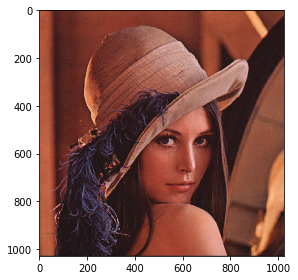

In [5]:
io.imshow(image)

### 2. 이미지 속성
imread() 함수로 이미지를 Load한 이미지는 numpy array 이기때문에 속성 정보는 사이즈와 채널 정보 정도만 알 수 있습니다.

In [6]:
print('이미지사이즈 : {}' .format(image.shape))
print('이미지 Width : {}'.format(image.shape[0]))
print('이미지 Height : {}'.format(image.shape[1]))

이미지사이즈 : (1028, 1024, 3)
이미지 Width : 1028
이미지 Height : 1024


### 3. 이미지 크기 변경

Resize (1028, 1024, 3) -> (171, 170, 3)


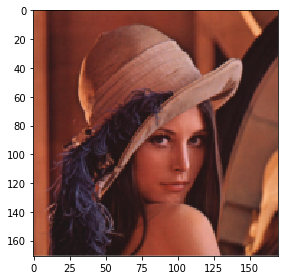

In [12]:
from skimage.transform import rescale, resize, downscale_local_mean

# 크기를 1/6 으로 변경
# 앨리어싱은 컴퓨터 그래픽에서 해상도의 한계로 선 등이 우둘투둘하게 되는 현상
image_resized =  resize(image, (image.shape[0] // 6, image.shape[1] //6), anti_aliasing=True)

print("Resize {} -> {}".format(image.shape, image_resized.shape))
io.imshow(image_resized)

### 4. 이미지 회전

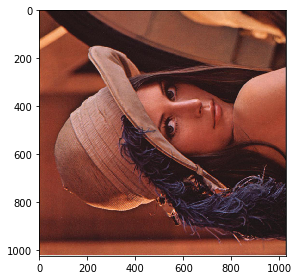

In [13]:
from skimage.transform import rotate

rotate_image = rotate(image, 90, resize=True)

io.imshow(rotate_image)

### 5. 이미지 상하, 좌우 대칭(Flip)

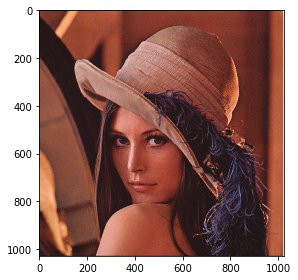

In [15]:
import numpy as np

flip_lr_image = np.fliplr(image)
io.imshow(flip_lr_image)


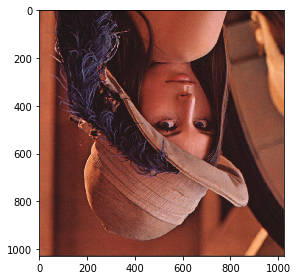

In [17]:
# 상하반전

flip_ud_image = np.flipud(image)
io.imshow(flip_ud_image)

### 6. 이미지 자르기(Crop)
[y1:y2, x1:x2]

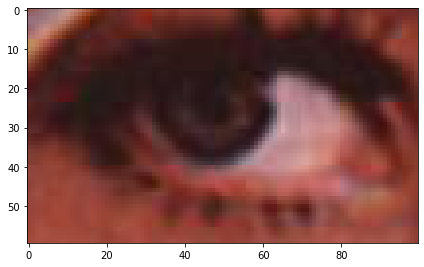

In [18]:
cropped_image = image[520:580, 480:580]
io.imshow(cropped_image)

### 7. Draw Box

/usr/local/lib/python3.7/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


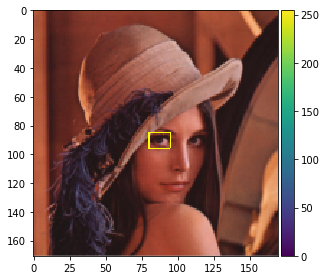

In [25]:
import numpy as np
from skimage import io, draw

image_resized = resize(image, (image.shape[0] // 6, image.shape[1] // 6), anti_aliasing=True)

color = np.array([255, 255, 0], dtype=np.uint8)
# x1, y1, w, h
bounding_box = (80, 85, 15, 11)


image_resized[bounding_box[1], bounding_box[0]:bounding_box[0] + bounding_box[2]] = color
image_resized[bounding_box[1]:bounding_box[1] + bounding_box[3], bounding_box[0]] = color

image_resized[bounding_box[1] + bounding_box[3], bounding_box[0]:bounding_box[0] + bounding_box[2]] = color
image_resized[bounding_box[1]:bounding_box[1] + bounding_box[3], bounding_box[0] + bounding_box[2]] = color

io.imshow(image_resized)

### 8. 이미지 필터링

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  


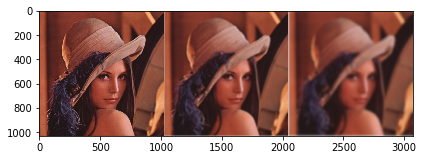

In [30]:
from skimage import filters
from skimage import io 

gaussian_filter_image = filters.gaussian(image, sigma=1.0)
gaussian_filter_image2 = filters.gaussian(image, sigma=5)
gaussian_filter_image3 = filters.gaussian(image, sigma=10)


merge_image = np.concatenate((gaussian_filter_image, gaussian_filter_image2, gaussian_filter_image3), axis=1)
io.imshow(merge_image)

### 9. 이미지 합치기

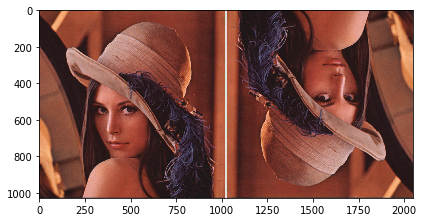

In [ ]:
merge_image = np.concatenate((filp_lr_image, filp_ud_image), axis=1)
io.imshow(merge_image)

### 10. 색상 모듈

Text(0.5, 1.0, 'HSV image')

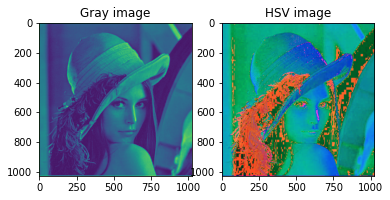

In [31]:
from skimage import io
from skimage import color
import matplotlib.pyplot as plt

# HSV = rgb2hsv(RGB)는 RGB 이미지의 빨간색, 녹색, 파란색 값을 HSV 이미지의 색상, 채도, 명도(HSV) 값으로 변환합니다.
# HSV 이미지로, [0, 1] 범위의 값으로 구성된 m×n×3 숫자형 배열로 반환
gray_image = color.rgb2gray(image)
hsv_image = color.rgb2hsv(image)

fig, axes = plt.subplots(nrows=1, ncols=2)
ax = axes.ravel()

ax[0].imshow(gray_image)
ax[0].set_title("Gray image")

ax[1].imshow(hsv_image)
ax[1].set_title("HSV image")

### 11. ORB feature detector and binary descriptor
- image feature를 얻는 알고리즘 중 FAST keypoint detector와 BRIEF descriptor가 합쳐진 형태로 가볍고 성능이 좋음


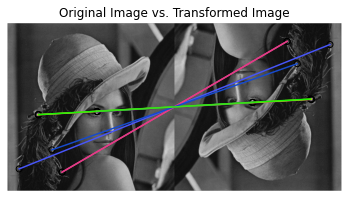

In [37]:
from skimage import transform
from skimage.color import rgb2gray
from skimage.feature import (match_descriptors, corner_harris, corner_peaks, ORB, plot_matches)
import matplotlib.pyplot as plt

url = 'https://user-images.githubusercontent.com/69428232/148015540-f3e81053-ef99-4f27-a8c2-b523784b3326.jpg'
response = requests.get(url)

image1 = io.imread(BytesIO(response.content))
image1 = rgb2gray(image1)
#image2 = rgb2gray(image1)
image2 = rotate(image1, 180, resize=True)

descriptor_extractor = ORB(n_keypoints=10)
descriptor_extractor.detect_and_extract(image1)
keypoints1 = descriptor_extractor.keypoints
descriptors1 = descriptor_extractor.descriptors

descriptor_extractor.detect_and_extract(image2)
keypoints2 = descriptor_extractor.keypoints
descriptors2 = descriptor_extractor.descriptors

matches12 = match_descriptors(descriptors1, descriptors2, cross_check=True)

fig, ax = plt.subplots(nrows=1, ncols=1)
plt.gray()

ax.axis('off')
ax.set_title("Original Image vs. Transformed Image")
plot_matches(ax, image1, image2, keypoints1, keypoints2, matches12)

### 12. BRIEF binary descriptor

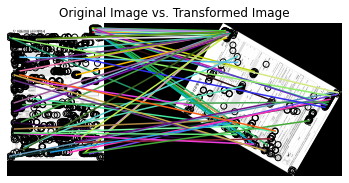

In [39]:
from skimage import transform
from skimage.feature import (match_descriptors, corner_peaks, corner_harris, plot_matches, BRIEF)
from skimage.color import rgb2gray
import matplotlib.pyplot as plt

url = 'https://user-images.githubusercontent.com/69428232/148020786-35786015-8356-4919-b2a3-24ac524230f8.jpg'
response = requests.get(url)

image1 = io.imread(BytesIO(response.content))
image1 = rgb2gray(image1)
image2 = rotate(image1, 60, resize=True)

# 코너가 특징점으로 잡기 쉬움
keypoints1 = corner_peaks(corner_harris(image1), min_distance=5, threshold_rel=0.3)
keypoints2 = corner_peaks(corner_harris(image2), min_distance=5, threshold_rel=0.3)

extractor = BRIEF()

extractor.extract(image1, keypoints1)
keypoints1 = keypoints1[extractor.mask]
descriptors1 = extractor.descriptors

extractor.extract(image2, keypoints2)
keypoints2 = keypoints2[extractor.mask]
descriptors2 = extractor.descriptors

matches12 = match_descriptors(descriptors1, descriptors2, cross_check=True)

fig, ax = plt.subplots(nrows=1, ncols=1)
plt.gray()

ax.axis('off')
ax.set_title("Original Image vs. Transformed Image")
plot_matches(ax, image1, image2, keypoints1, keypoints2, matches12)